# 7.1. О чём этот модуль
Этот модуль посвящён кластеризации.

Кластеризация — это задача разбиения некого количества объектов на группы (кластеры), при этом объекты в группах должны иметь что-то общее и сильно отличаться от объектов в других кластерах. Перечень групп определяется в процессе работы алгоритма, а не заранее. Задача кластеризации является задачей обучения без учителя.

По сути, кластеризация очень похожа на задачу классификации, но без известных заранее классов. Алгоритм самостоятельно находит близкие по каким-то признакам точки и объединяет их в кластеры. Подобную операцию вы можете наблюдать, если будете искать какие-то часто встречающиеся объекты на карте.

Предположим, вы хотите арендовать квартиру и ищете подходящие варианты по заданным вами параметрам.

Если вы будете рассматривать карту вблизи, то точки-квартиры будут стоять на домах по отдельности:
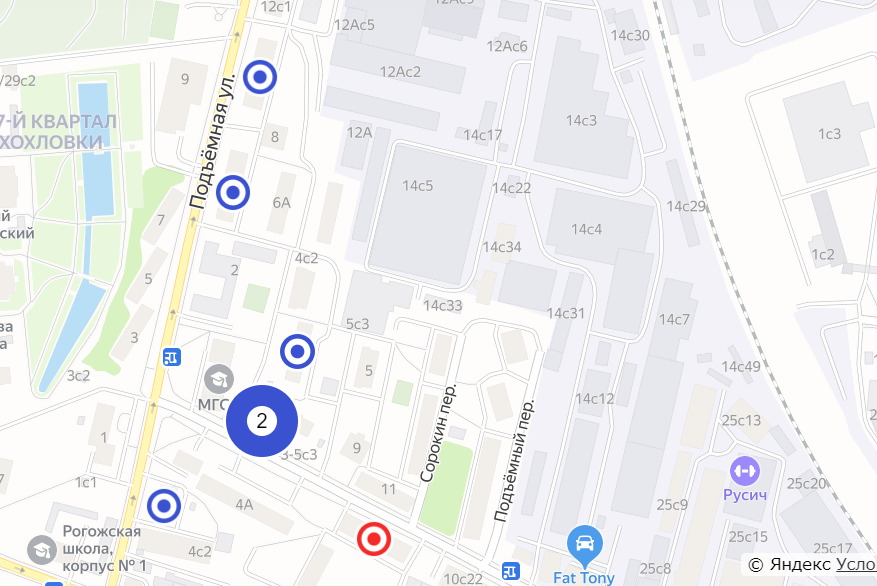
Если же вы отдалите карту, то квартиры соединятся в кластеры по географической близости:
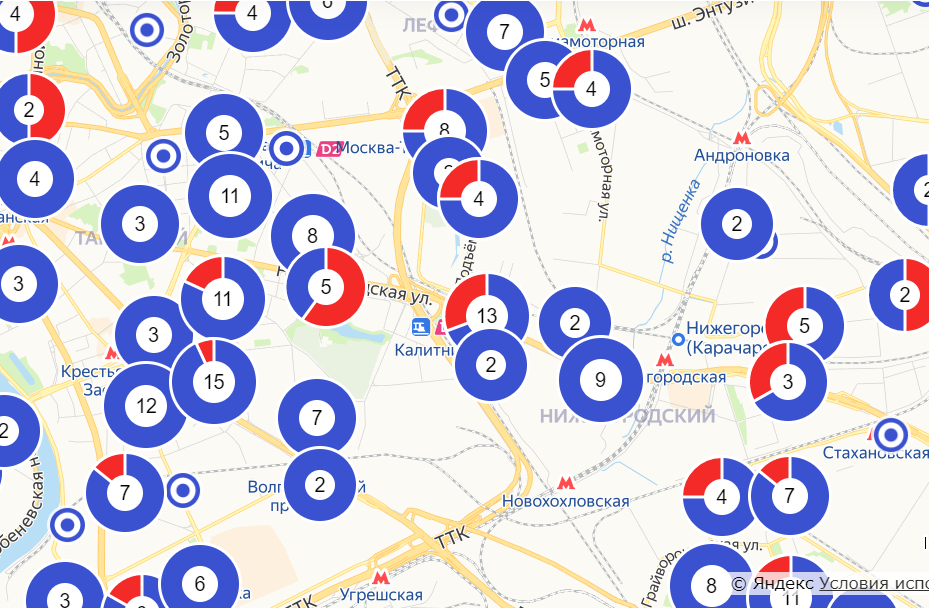
C помощью кластеризации можно решать следующие задачи:
- сегментация рынка;
- объединение близких точек на карте;
- сжатие изображений;
- детекторы аномального поведения;
- выделение схожих групп респондентов на основании соцопросов;
- формирование поведенческих паттернов людей;
- выделение схожих по экономическим показателям регионов;
- сегментация изображений для выделения объектов.

План модуля:
- Задачи и подходы кластеризации.
- Условия задач кластеризации.
- Алгоритмы кластеризации: K-Means, EM-алгоритм, агломеративная кластеризация, DBSCAN.
- Сравнение алгоритмов.
- Оценка качества: внутренние и внешние оценки.

# 7.2. Задачи и подходы кластеризации
Задача кластеризации:
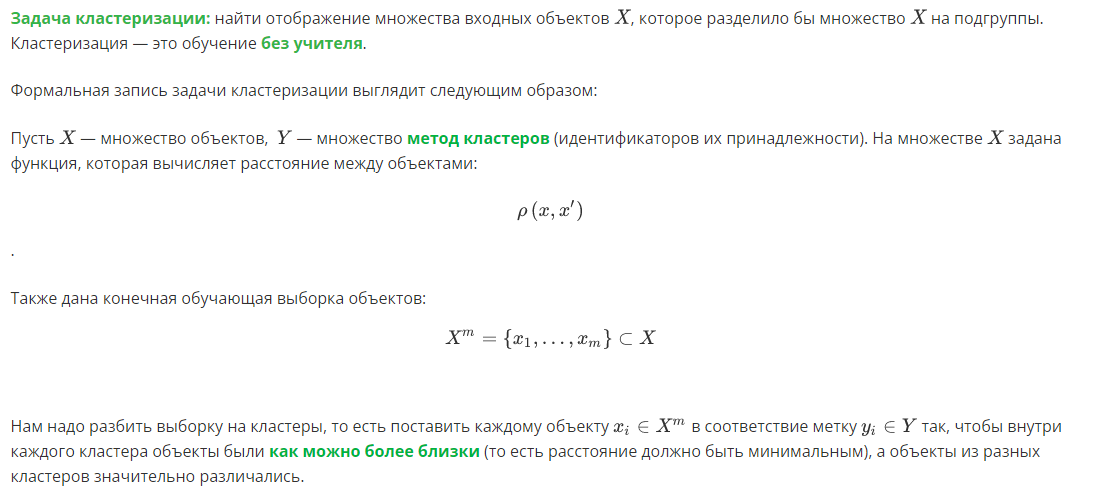
В задаче кластеризации входные данные задаются двумя способами:
- Признаковое описание объектов: все объекты описываются некоторыми характеристиками (значениями признаков)
- Матрица расстояний между объектами: для каждого объекта представлены расстояния от него до всех остальных объектов выборки

Некорректность задачи кластеризации — решение задачи кластеризации принципиально неоднозначно:
- Нет точной постановки задачи кластеризации.
- Существует множество критериев качества кластеризации.
- Существует множество методов кластеризации.
- Часто заранее неизвестно число кластеров.
- Результат кластеризации зависит от метрики, которая задаётся субъективно.

Для чего нужны разные подходы кластеризации?

1. Разные цели кластеризации:
- Упростить дальнейшую обработку данных: разбить множество объектов на несколько групп (кластеров), чтобы в дальнейшем работать с каждым кластером в отдельности
- Сократить объём хранимых данных: выделить кластеры и оставить по одному объекту от каждого кластера и таким образом сжать данные
- Выделить нетипичные объекты: выделить объекты, которые нельзя отнести ни к одному из кластеров
- Построить иерархию множества объектов: задача таксономии.
2. Разнообразие условий задач кластеризации.
Подробнее про условия задач мы поговорим в следующем уроке.

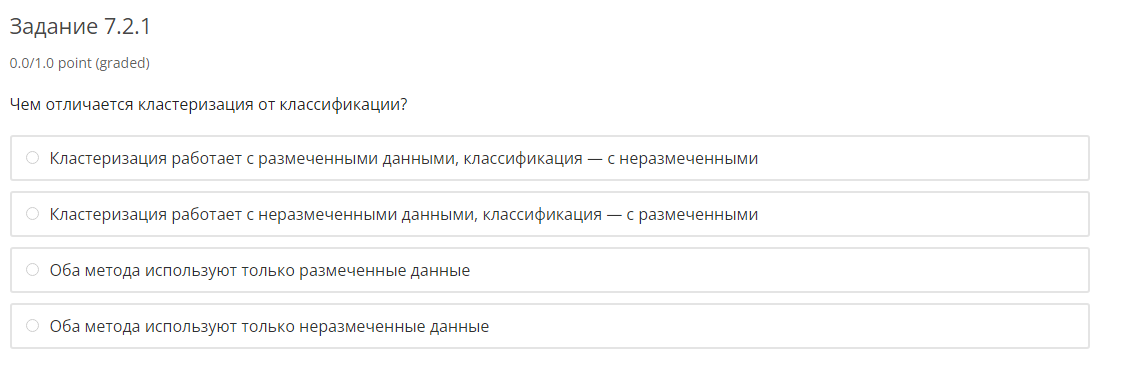

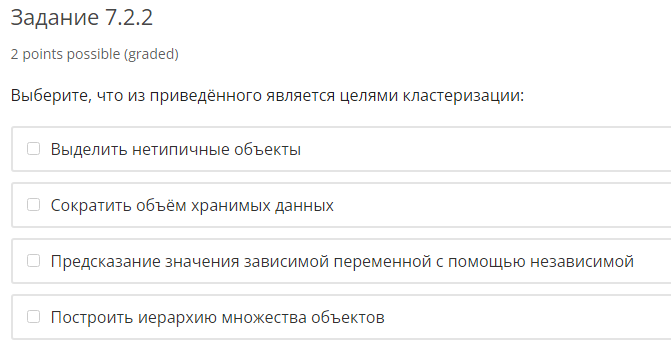

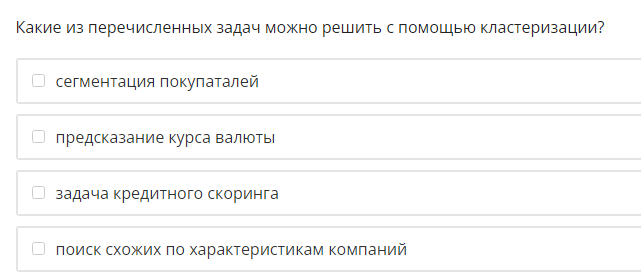

# 7.3. Условия задач кластеризации
- Форма кластеров: внутрикластерные расстояния меньше межкластерных, ленточная структура, кластеры с центром, кластеры соединены перемычками, разреженный фон, пересекающиеся кластеры, кластеры отсутствуют, кластеры образуются не по близости расстояний.
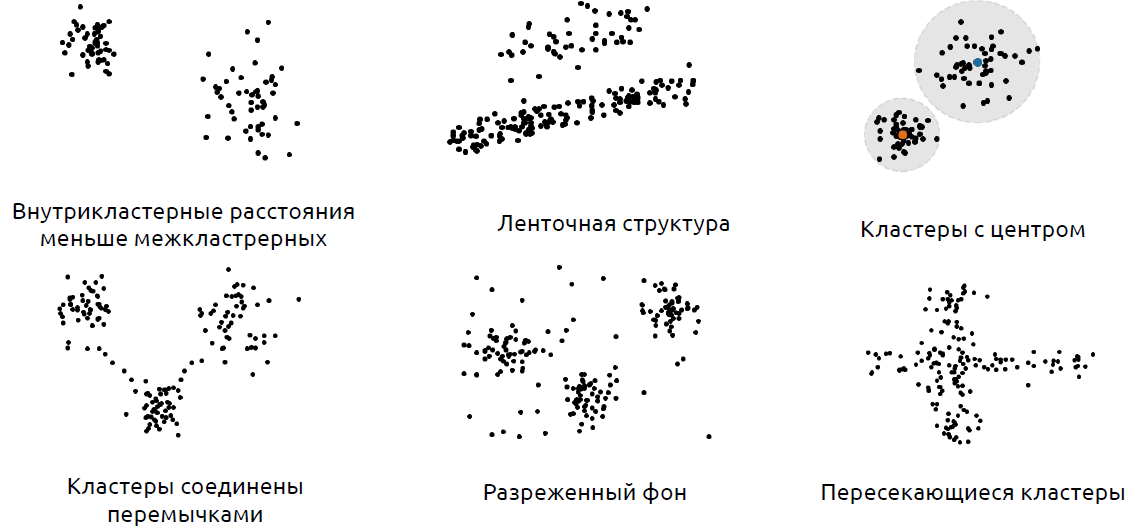
- Вложенность кластеров друг в друга.
- Размер кластеров: один кластер — одна тема, один кластер — одно большое событие, один кластер — одна новость.
- Кластеризация как основная или вспомогательная задача.
- Жёсткая (определяем конкретный кластер для объекта) или мягкая (определяем вероятность принадлежности объекта к кластеру) кластеризация.

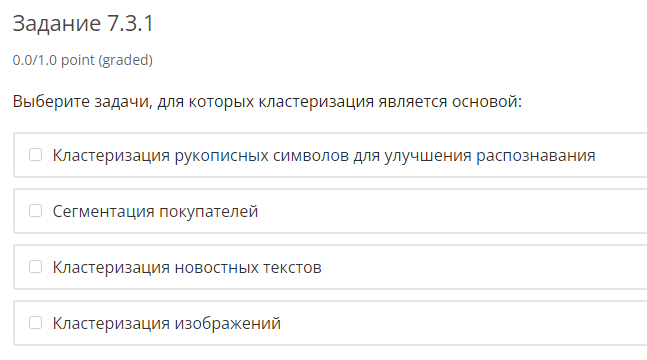

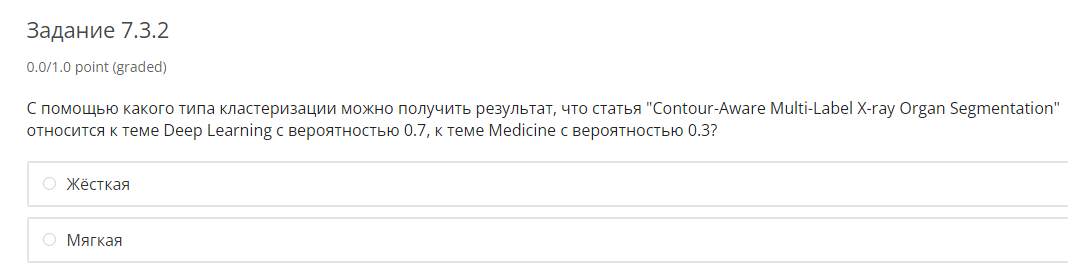

# 7.4. Алгоритмы кластеризации
Рассмотрим четыре основных алгоритма кластеризации:

k-means;
EM-алгоритм;
DBSCAN;
агломеративная кластеризация.
K-MEANS
k-means является одним из самых популярных и простых алгоритмов кластеризации. В ходе этого алгоритма все элементы пространства разбиваются на заранее известное (заданное) количество кластеров. Суть алгоритма состоит в том, что он пытается оптимизировать расстояние всех точек кластера от центра этого кластера. То есть он формирует кластеры так, чтобы внутри каждого сумма квадратов расстояний от точек до центра кластера была как можно меньше.

    Схема действия алгоритма k-means
    - Выбрать количество кластеров, которое нам кажется оптимальным для наших данных.
    - Выбрать случайным образом в пространство наших данных центроиды.
    - Для каждой точки набора данных посчитать, к какому центроиду она ближе.
    -Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду. Каждый центроид на каждой итерации — вектор, элементы которого представляют собой средние значения признаков, вычисленные по всем записям кластера.
    - Повторять шаги 3-4 фиксированное число раз или до тех пор, пока центроиды не сойдутся.

Итерации алгоритма выглядят визуально следующим образом:
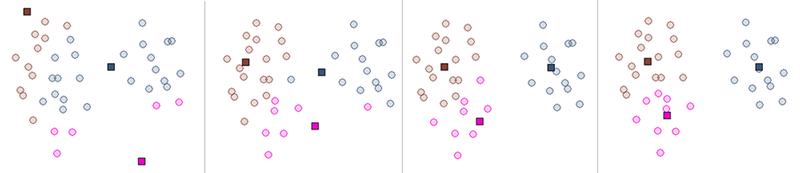
У этого алгоритма есть ряд недостатков:
- число кластеров надо знать заранее;
- алгоритм очень чувствителен к первичному выбору центроидов;
- не гарантирует достижение глобального минимума суммы квадратов расстояний, часто «застревает» в локальном минимуме.

У данного алгоритма есть также вариации, которые применяются в некоторых специфических случаях.   Рассмотрим их ниже.

### Mini-Batch K-means
Данная вариация k-means используется в случае, если данных очень много. Из-за объема данных вычисление центров по всей выборке происходит долго. Решение проблемы: на каждом шаге k-means работать с небольшой подвыборкой данных. В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. Однако исследования показывают, что качество кластеров может ухудшаться по сравнению с классическим k-means.

### K-means++
Ещё одну вариацию алгоритма k-means мы используем в том случае, если у нас очень много признаков. Как известно, результат и время работы k-means зависит от изначального выбора центров. Чтобы минимизировать затраты, мы будем действовать следующим образом:
- Первый центр выбираем случайно из равномерного распределения на выборке.
- Каждый следующий центр выбираем случайно из оставшихся точек так, чтобы вероятность выбрать каждую точку была пропорциональна квадрату расстояния от неё до ближайшего центра.

### EM-АЛГОРИТМ
Следующий алгоритм кластеризации — EM-алгоритм. Последовательность действий в нём выглядит следующим образом:

    Схема действий EM-алгоритма
    - Выбрать количество кластеров, которое нам кажется оптимальным для наших данных.
    - Выбрать случайным образом в пространство наших данных параметры распределений.
    - Для каждой точки нашего набора данных посчитать вероятность принадлежности к каждому кластеру.
    - Обновить параметры распределений таким образом, чтобы максимизировать вероятность принадлежности точек, отнесённых к кластеру.
    - Повторять шаги 3-4 фиксированное число раз, либо до тех пор пока центроиды не сойдутся.

### Пример
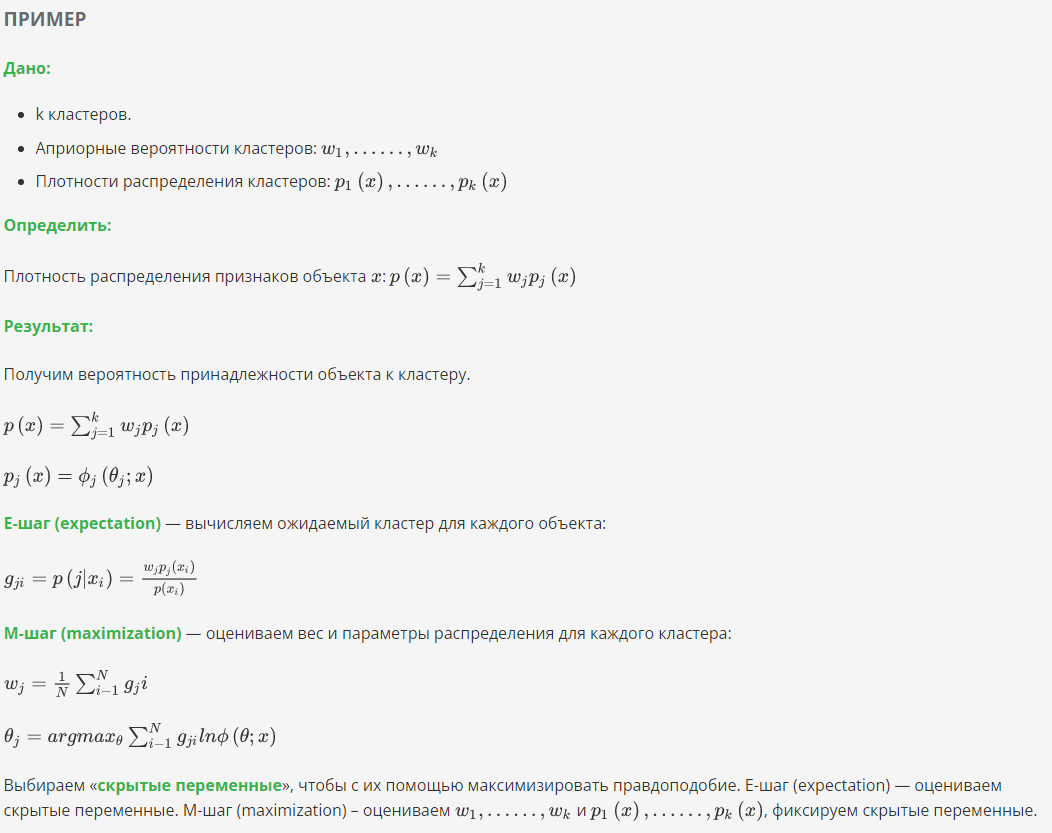
Можно выделить следующие преимущества алгоритма:
- Эффективная обработка больших объемов данных (Big Data).
- Мощная статистическая основа.
- Устойчивость к шумам и пропускам в данных.
- Возможность построения желаемого числа кластеров.
- Быстрая сходимость при удачной инициализации.

Недостатки алгоритма следующие:
- При неудачной инициализации сходимость алгоритма может оказаться медленной.
- Предположение о нормальности всех измерений данных не всегда выполняется.
- Алгоритм иногда останавливается в локальном минимуме и не достигает глобального.

### АГЛОМЕРАТИВНАЯ КЛАСТЕРИЗАЦИЯ
Иерархическая кластеризация делится на две стратегии: агломеративная — снизу-вверх, объединяем точки в кластеры и дивизионная — сверху-вниз, разделяем один большой кластер на малые.

- Назначаем каждой точке свой кластер.
- Сортируем попарные расстояния между центрами кластеров по возрастанию.
- Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера.
- Повторяем шаги 2-3 до тех пор, пока все данные не склеятся в один кластер.

Визуально это выглядит следующим образом:
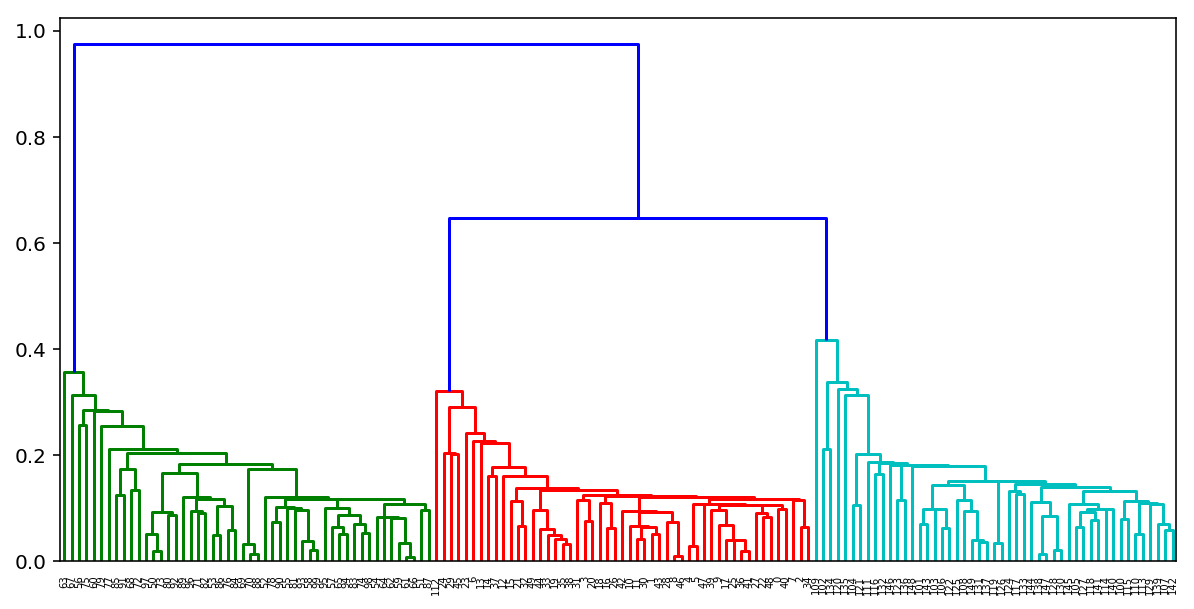
Расстояние между кластерами:
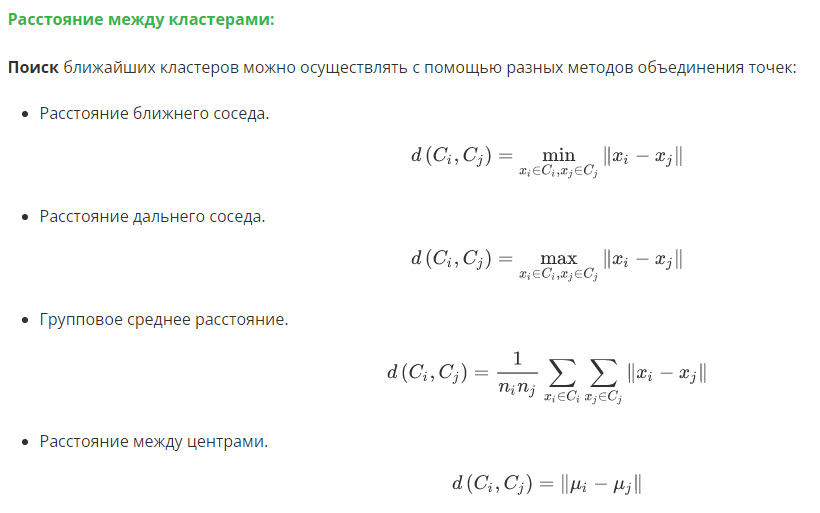
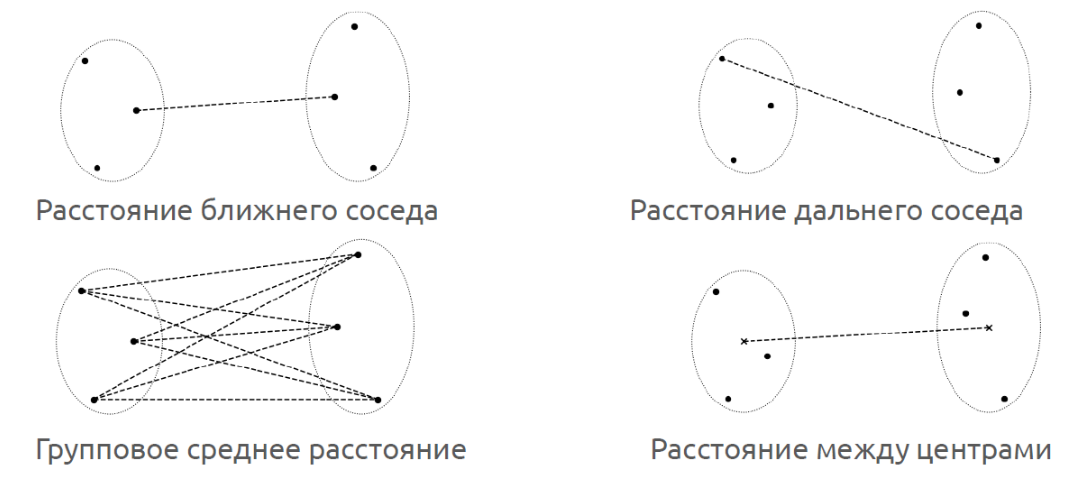
#### Формула Ланса-Уильямса: 
#### Расстояние Уорда:
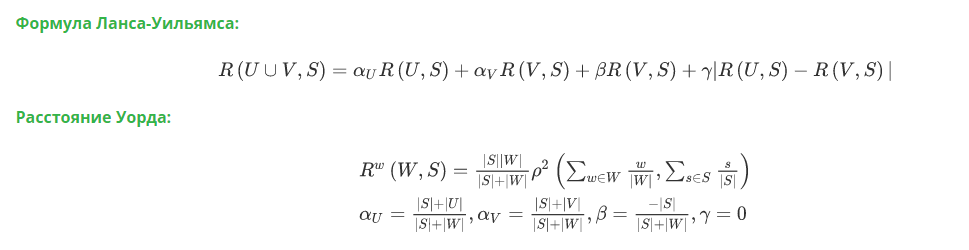
# DBSCAN
Расшифровывается как Dense-based spatial clustering of applications with noise. Это основанная на плотности пространственная кластеризация для приложений с шумами.
Схема действия DBSCAN
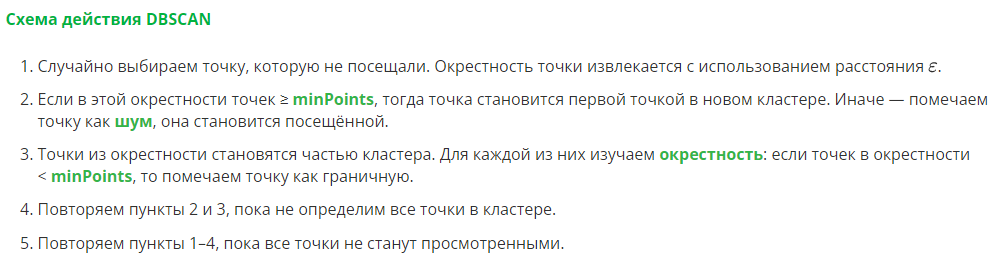
Главная идея:
- Основные точки.
- Граничные точки.
- Шумовые точки.

Достоинства алгоритма:
- не требуется число кластеров;
- определяем кластеры произвольной формы;
- определяет шум, устойчив к выбросам.

Недостатки алгоритма:
- не может выделять кластеры, имеющие разную плотность;
- результат зависит от используемой функции расстояния.

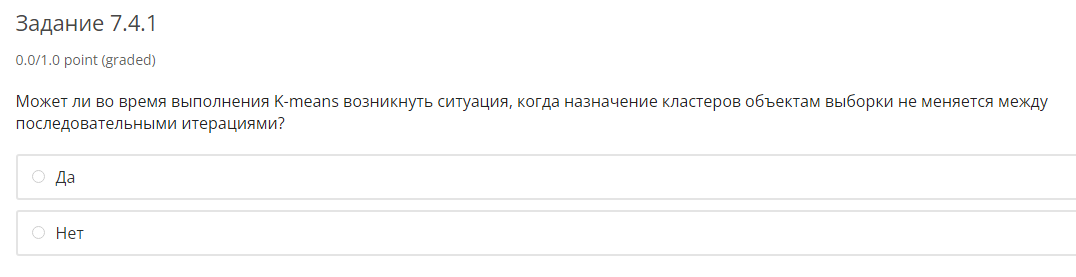

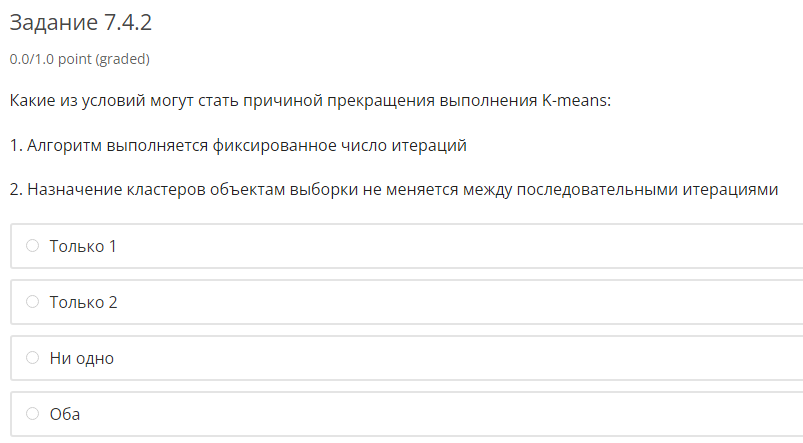

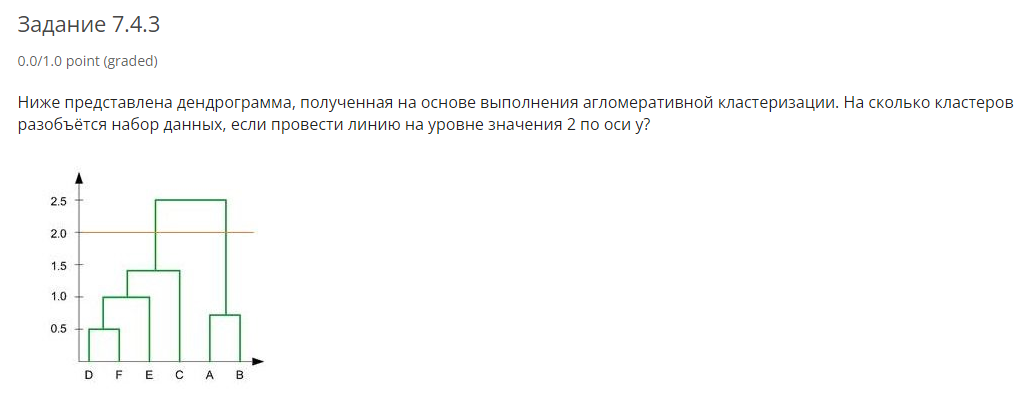

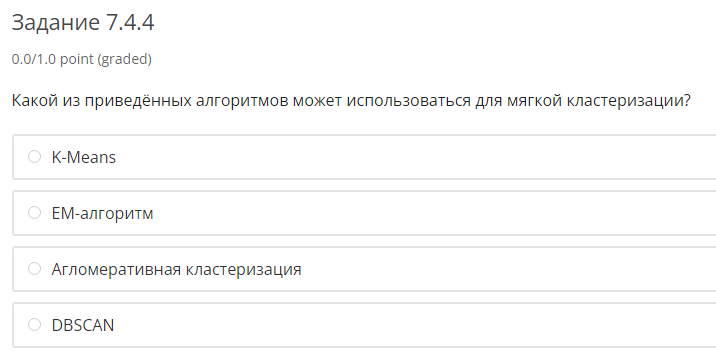

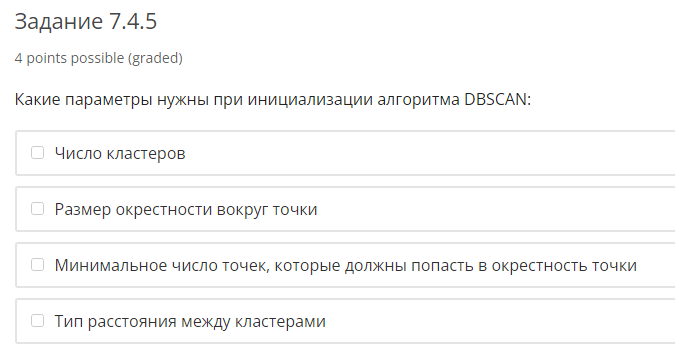

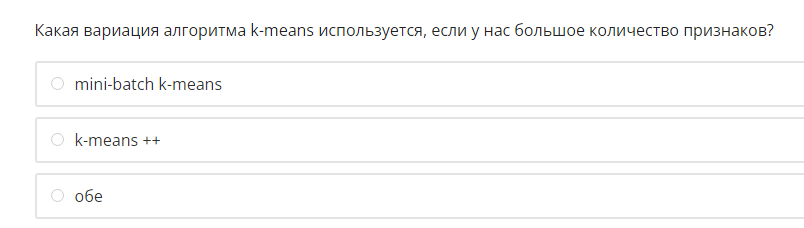

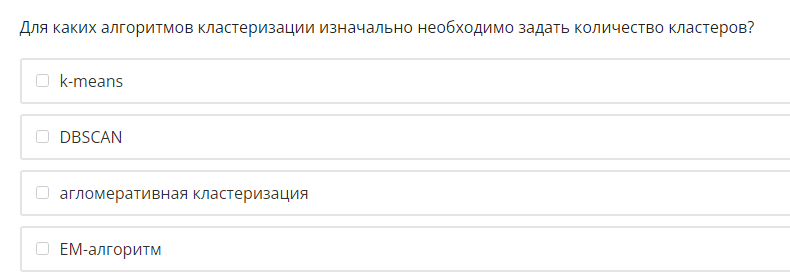

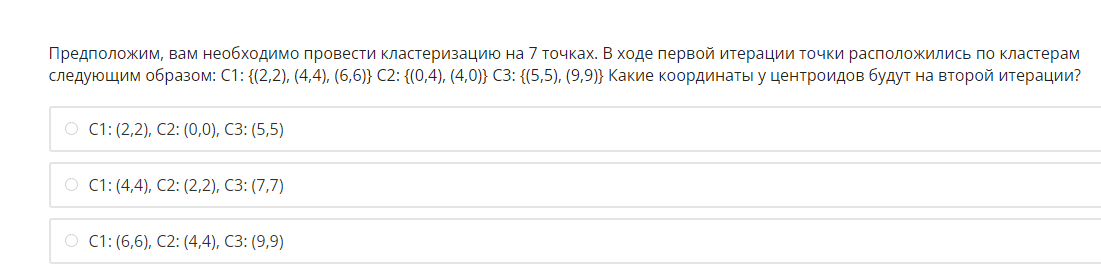

# 7.5. K-means. Практика
Выберем оптимальное количество кластеров для наших данных: в нашем случае, это семь кластеров, один из которых в центре. Добавим случайным образом семь центроид. (центроиды — предполагаемые центры будущих кластеров) Для каждой точки мы можем посчитать, к какому центроиду она ближе и окрасить в соответствующий цвет. Перенесём центроид в центр выборки, к которой мы его отнесли: то есть, расположим его так. чтобы расстояния от объектов кластера до центроида были как можно меньше.. Повторим эти шаги, пока алгоритм не сойдётся.

Рассмотрим, с какими наборами данных будут работать наши алгоритмы. Первый набор данных — три хорошо разделимых кластера, второй — три кластера с добавлением шума, далее — кластеры с ленточной структурой. В нижнем ряду сложные случаи, когда кластеры вписываются друг в друга или не имеют структуру.

Посмотрим, как организован алгоритм K-means в библиотеке Sklearn. Импортируем данные, при инциализации можем указать ожидаемое число кластеров, способ инициализации центроид, максимальное число интераций.

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8,  #количество кластеров
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300 #максимальное количество итераций
                )

Как же будет работать алгоритм на наших данных? Вызываем метод k_means.fit(), который будет обучаться на нашем наборе данных. Далее строим графики для каждого из наших датасетов.

In [ ]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма - количества кластеров
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

 # НОУТБУК К СКРИНКАСТУ
 (https://lms.skillfactory.ru/assets/courseware/v1/3bd45efde7d8f4d6deeb299402a81355/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/ClusteringAlgorithms.ipynb)

Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

In [ ]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [1]:
from sklearn.cluster import KMeans
k_means = KMeans()

При создании объекта можно указать следующие параметры:

n_clusters — число кластеров, на которое алгоритм будет делить набор данных;
init — способ начальной инициализации центроидов кластров;
random_state — фиксирует генерацию случайного числа для инициализации центроидов.
Полный список параметров доступен в документации (англ.). (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

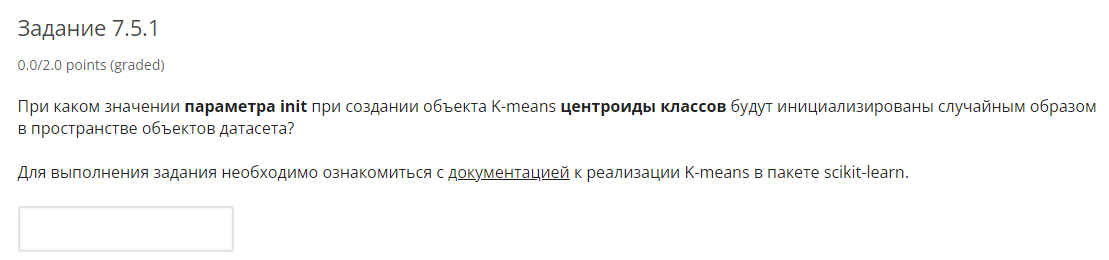

# Задание 7.5.2
Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:
```k_means.fit(X)```

Обучив, мы можем получить центроиды кластеров:
```k_means.cluster_centers_```

И узнать, в какой кластер попал каждый из объектов:
```k_means.labels_```

Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

```import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))
```
# Вывод
[0 1 2]   
astype(np.int) конвертирует элементы массива в целые числа.

Подсказка: В ответ скопируйте и вставьте вывод кода. Пример ввода: [[X Y] [A B] [C D]]. Числа должны быть целые, без десятичных знаков и точек.

# Задание 7.5.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

```import numpyasnp
a = [0, 0, 0, 1, 1, 2]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')
```
# Вывод
3 2 1  

Для визуализации получившегося датасета можно использовать следующий код:

```k_means_pred = k_means.labels_
plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()
```

# ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

Подгрузите данные и откройте их.

### СКАЧАТЬ ДАННЫЕ 
(https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/snsdata.csv)

В датасете для учеников предоставлены следующие признаки:
- Год выпуска
- Пол
- Возраст
- Количество друзей
- 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

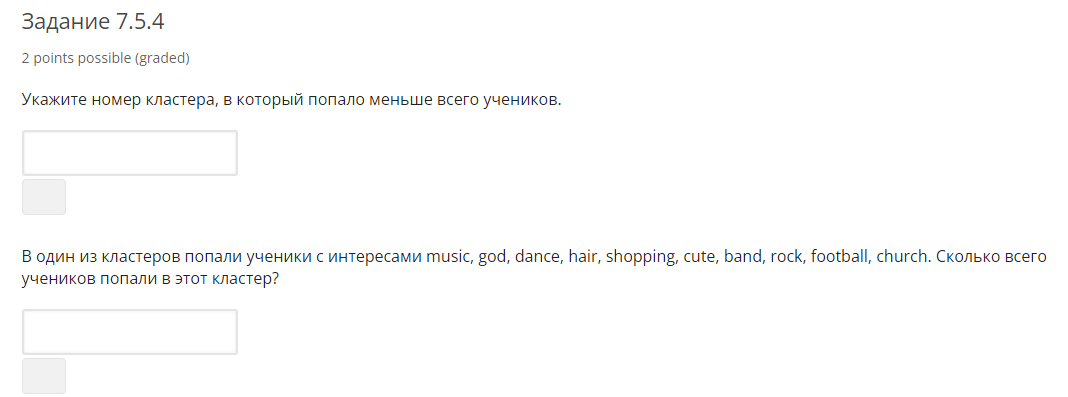

# 7.6. EM-алгоритм. Практика
